In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# read results from csv
problem_sets = [
    "Bohachevsky",
    "Booth",
    # "mf_Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Himmelblau",
    "Park91A",
    "Park91B",
    "Sixhump",
]

# create a dataframe to store results
mf_rbf_gpr_results = pd.DataFrame()
# use a for loop to read all csv files
for problem_set in problem_sets:
    input = pd.read_csv("../" + problem_set + "/exp_mf_rbf_gpr_input.csv", index_col=0)
    output = pd.read_csv(
        "../" + problem_set + "/exp_mf_rbf_gpr_output.csv", index_col=0
    )
    # merge input and output dataframes
    df = pd.merge(input, output, left_index=True, right_index=True)

    # add df to results
    mf_rbf_gpr_results = pd.concat([mf_rbf_gpr_results, df])

# load the results from the gpr experiments
gpr_input = pd.read_csv("../gpr_expriments/exp_gpr_input.csv", index_col=0)
gpr_output = pd.read_csv("../gpr_expriments/exp_gpr_output.csv", index_col=0)
# merge input and output dataframes
gpr_results = pd.merge(gpr_input, gpr_output, left_index=True, right_index=True)

In [3]:
# add one more column to calculate the error of noise_level
mf_rbf_gpr_results["noise_error"] = np.abs(
    mf_rbf_gpr_results["noise_std"] - mf_rbf_gpr_results["learned_noise_std"]
)
gpr_results["noise_error"] = np.abs(
    gpr_results["noise_std"] - gpr_results["learned_noise_std"]
)

In [4]:
# get results with noise_std = 0.3 for mf_rbf_gpr and gpr
mf_rbf_gpr_results_noise_3 = mf_rbf_gpr_results[mf_rbf_gpr_results["noise_std"] == 0.3]
gpr_results_noise_3 = gpr_results[gpr_results["noise_std"] == 0.3]

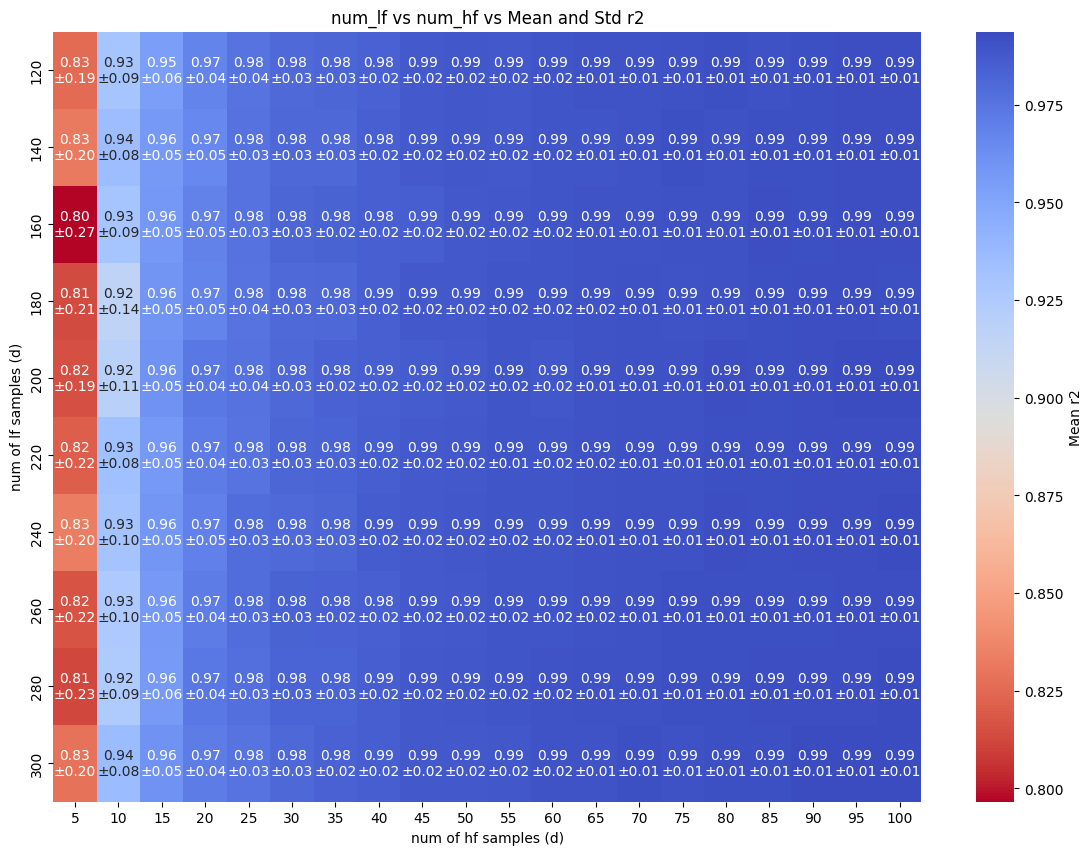

In [5]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = mf_rbf_gpr_results_noise_3.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

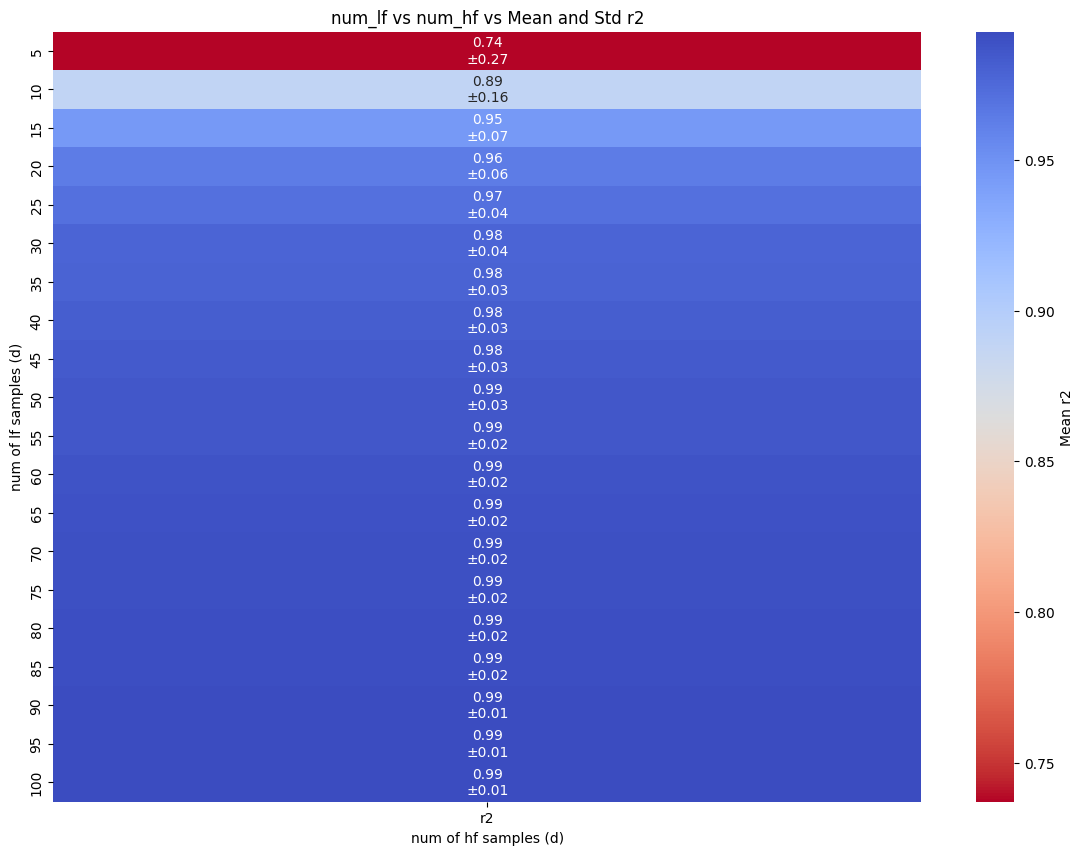

In [6]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = gpr_results.pivot_table(
    values="r2", index="num_sample", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


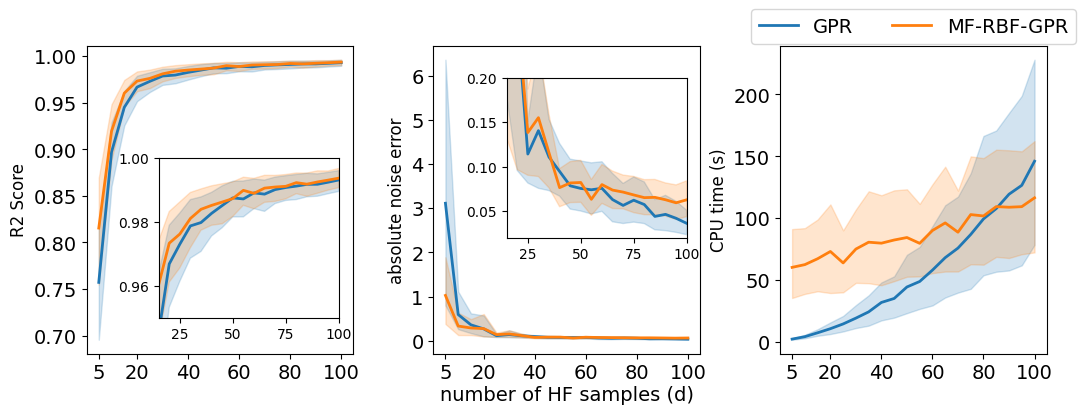

In [28]:
# get the results for 120 samples
mf_rbf_gpr_200 = mf_rbf_gpr_results_noise_3[mf_rbf_gpr_results_noise_3["num_lf"] == 200]

font_size = 12
# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plotting mae
sns.lineplot(
    data=gpr_results_noise_3,
    x="num_sample",
    y="r2",
    linewidth=2,
    ax=axes[0],
)
sns.lineplot(
    data=mf_rbf_gpr_200,
    x="num_hf",
    y="r2",
    linewidth=2,
    ax=axes[0],
)
axes[0].set_xticks([5, 20, 40, 60, 80, 100])
axes[0].set_xlabel(" ", fontsize=font_size)
axes[0].set_ylabel("R2 Score", fontsize=font_size)

# Plotting rmse
sns.lineplot(
    data=gpr_results_noise_3,
    x="num_sample",
    y="noise_error",
    linewidth=2,
    ax=axes[1],
)
sns.lineplot(
    data=mf_rbf_gpr_200,
    x="num_hf",
    y="noise_error",
    linewidth=2,
    ax=axes[1],
)
axes[1].set_xlabel(" ", fontsize=font_size)
axes[1].set_xticks([5, 20, 40, 60, 80, 100])
axes[1].set_ylabel("absolute noise error", fontsize=font_size)
# axes[1].set_ylim([0, 0.5])

sns.lineplot(
    data=gpr_results_noise_3,
    x="num_sample",
    linewidth=2,
    y="cpu_time",
    label="GPR",
    ax=axes[2],
)
sns.lineplot(
    data=mf_rbf_gpr_200,
    x="num_hf",
    linewidth=2,
    y="cpu_time",
    label="MF-RBF-GPR",
    ax=axes[2],
)

axes[2].set_xlabel(" ", fontsize=font_size)
axes[2].set_ylabel("CPU time (s)", fontsize=font_size)
axes[2].set_xticks([5, 20, 40, 60, 80, 100])

# set font size
font_size = 14
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=font_size)
plt.subplots_adjust(left=0.1, right=0.9, wspace=0.3)
axes[0].tick_params(labelsize=font_size)
axes[1].tick_params(labelsize=font_size)
axes[2].tick_params(labelsize=font_size)
# add text at the bottom with the number of samples
axes[0].text(
    1.8,
    -0.15,
    "number of HF samples (d)",
    fontsize=font_size,
    transform=axes[0].transAxes,
    horizontalalignment="center",
)

# zoomed in plot
ax_inset0 = plt.axes([0.16, 0.2, 0.15, 0.40])
sns.lineplot(
    data=gpr_results_noise_3,
    x="num_sample",
    y="r2",
    linewidth=2,
    ax=ax_inset0,
)
sns.lineplot(
    data=mf_rbf_gpr_200,
    x="num_hf",
    y="r2",
    linewidth=2,
    ax=ax_inset0,
)

ax_inset0.set_xlim([15.0, 100.0])
ax_inset0.set_ylim([0.95, 1.00])
ax_inset0.legend().set_visible(False)
ax_inset0.set_xlabel("")
ax_inset0.set_ylabel("")


# zoomed in plot
ax_inset1 = plt.axes([0.45, 0.4, 0.15, 0.40])
sns.lineplot(
    data=gpr_results_noise_3,
    x="num_sample",
    y="noise_error",
    linewidth=2,
    ax=ax_inset1,
)
sns.lineplot(
    data=mf_rbf_gpr_200,
    x="num_hf",
    y="noise_error",
    linewidth=2,
    ax=ax_inset1,
)

ax_inset1.set_xlim([15.0, 100.0])
ax_inset1.set_ylim([0.02, 0.2])
ax_inset1.legend().set_visible(False)
ax_inset1.set_xlabel("")
ax_inset1.set_ylabel("")
# Adjust layout
plt.savefig("gpr_comparison_at_200lf_samples.png", dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.pdf", dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.svg", dpi=300, bbox_inches="tight")

plt.show()

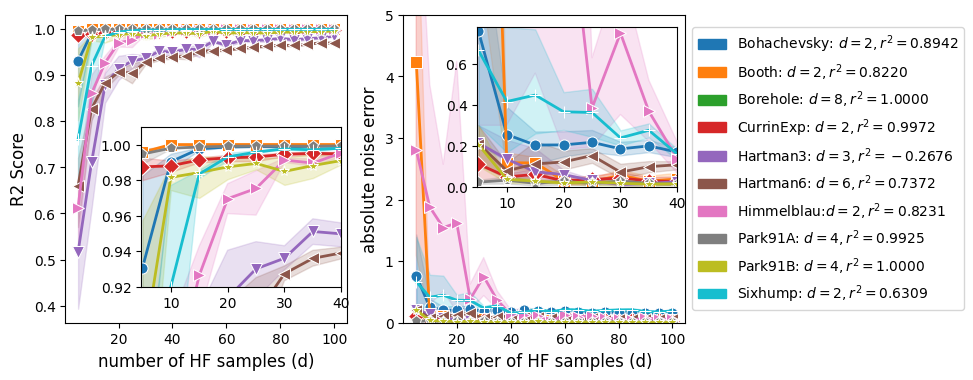

In [8]:
# Define colors corresponding to each problem
colors = {
    "mf_Bohachevsky": "#1f77b4",
    "mf_Booth": "#ff7f0e",
    "mf_Borehole": "#2ca02c",
    "mf_CurrinExp": "#d62728",
    "mf_Hartman3": "#9467bd",
    "mf_Hartman6": "#8c564b",
    "mf_Himmelblau": "#e377c2",
    "mf_Park91A": "#7f7f7f",
    "mf_Park91B": "#bcbd22",
    "mf_Sixhump": "#17becf",
}
markers = {
    "mf_Bohachevsky": "o",
    "mf_Booth": "s",
    "mf_Borehole": "^",
    "mf_CurrinExp": "D",
    "mf_Hartman3": "v",
    "mf_Hartman6": "<",
    "mf_Himmelblau": ">",
    "mf_Park91A": "p",
    "mf_Park91B": "*",
    "mf_Sixhump": "+",
}

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
for problem, color in colors.items():
    subset = mf_rbf_gpr_200[mf_rbf_gpr_200["problem"] == problem]
    sns.lineplot(
        x=subset["num_hf"],
        y=subset["r2"],
        color=color,
        label=problem,
        linewidth=2,
        marker=markers[problem],
        markersize=8,  # Adjust the marker size as needed
        ax=ax[0],
    )
    sns.lineplot(
        x=subset["num_hf"],
        y=subset["noise_error"],
        color=color,
        label=problem,
        linewidth=2,
        marker=markers[problem],
        markersize=8,  # Adjust the marker size as needed
        ax=ax[1],
    )
ax[0].set_xlabel("number of HF samples (d)", fontsize=12)
ax[0].set_ylabel("R2 Score", fontsize=12)
ax[1].set_xlabel("number of HF samples (d)", fontsize=12)
ax[1].set_ylabel("absolute noise error", fontsize=12)
ax[1].set_ylim([0, 5])
# plt.tick_params(labelsize=12)

#
ax_inset0 = plt.axes([0.22, 0.2, 0.25, 0.40])
for problem, color in colors.items():
    subset = mf_rbf_gpr_200[mf_rbf_gpr_200["problem"] == problem]
    sns.lineplot(
        x=subset["num_hf"],
        y=subset["r2"],
        color=color,
        label=problem,
        linewidth=2,
        marker=markers[problem],
        markersize=8,  # Adjust the marker size as needed
        ax=ax_inset0,
    )
ax_inset0.set_xlim([4.8, 40.0])
ax_inset0.set_ylim([0.92, 1.01])
ax_inset0.legend().set_visible(False)
ax_inset0.set_xlabel("")
ax_inset0.set_ylabel("")

# second zoomed in plot
ax_inset = plt.axes([0.64, 0.45, 0.25, 0.40])
for problem, color in colors.items():
    subset = mf_rbf_gpr_200[mf_rbf_gpr_200["problem"] == problem]
    sns.lineplot(
        x=subset["num_hf"],
        y=subset["noise_error"],
        color=color,
        label=problem,
        linewidth=2,
        marker=markers[problem],
        markersize=8,  # Adjust the marker size as needed
        ax=ax_inset,
    )
ax_inset.set_xlim([4.8, 40.0])
ax_inset.set_ylim([0, 0.78])
ax_inset.legend().set_visible(False)
ax_inset.set_xlabel("")
ax_inset.set_ylabel("")
# Set the custom legend
legend_elements = [
    Patch(color="#1f77b4", label=r"Bohachevsky: $d=2, r^2=0.8942$"),
    Patch(color="#ff7f0e", label=r"Booth: $d=2, r^2=0.8220$"),
    Patch(color="#2ca02c", label=r"Borehole: $d=8, r^2=1.0000$"),
    Patch(color="#d62728", label=r"CurrinExp: $d=2, r^2=0.9972$"),
    Patch(color="#9467bd", label=r"Hartman3: $d=3, r^2=-0.2676$"),
    Patch(color="#8c564b", label=r"Hartman6: $d=6, r^2=0.7372$"),
    Patch(color="#e377c2", label=r"Himmelblau:$ d=2, r^2=0.8231$"),
    Patch(color="#7f7f7f", label=r"Park91A: $d=4, r^2=0.9925$"),
    Patch(color="#bcbd22", label=r"Park91B: $d=4, r^2=1.0000$"),
    Patch(color="#17becf", label=r"Sixhump: $d=2, r^2=0.6309$"),
]
# set the legend to the right of the plot
ax[1].legend(
    handles=legend_elements,
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
    fontsize=10,
)
# remove the legend for the first plot
ax[0].legend().remove()

# save the figure
plt.savefig("mf_rbf_gpr_200lf_analysis.png", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_gpr_200lf_analysis.pdf", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_gpr_200lf_analysis.svg", dpi=300, bbox_inches="tight")


plt.show()